In [1]:
import os,csv,json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import seaborn as sns
colorpalette = ['#65BADA','#87D0E2','#068E8C','#75B3A7','#00A757','#82BA4F','#E5BA52','#F3EA1F','#D86F27','#E89E23','#C82E6B','#D4668F','#991B37','#C30021','#364285','#5D5296','#7D5495']

In [4]:
# import csv
csv_file_name = "/Users/emilydennis/Desktop/lightsheet_inprogress/humanvselastix.csv"

In [5]:
fulldf = pd.read_csv(csv_file_name)
fulldf.keys()

Index(['volume', 'point', 'annotator', 'z', 'x', 'y', 'brainid'], dtype='object')

In [6]:
fulldf_nocomp = fulldf[fulldf.annotator != 'computer']
fulldf_comp = fulldf[fulldf.annotator == 'computer']

In [7]:
alldata = { } 

for name in np.unique(fulldf_nocomp.annotator):
    alldata[name] = {}
    annotator = fulldf[fulldf.annotator==name]
    for volume in ["A","B","C","D","E","F","G","H"]:
        annotatorvol = annotator[annotator.volume==volume]
        alldata[name][volume]= {}
        for point in range(1,5):
            annotatorpt = annotatorvol[annotatorvol.point==point]
            alldata[name][volume][point] = [annotatorpt.x.tolist(),annotatorpt.y.tolist(),annotatorpt.z.tolist()]



In [8]:
# now that our data is easier to index, want to make different values for plotting
toplot = { } 

for name in np.unique(fulldf_nocomp.annotator):
    toplot[name] = {}
    #want C vs G
    toplot[name]['humanvar'] = {}
    for point in range(1,5):
        vals=(abs(np.subtract(alldata[name]['C'][point],alldata[name]['G'][point])))
        val = np.add(vals[0],vals[1],vals[2])
        toplot[name]['humanvar'][point] = val.item()
    toplot[name]['before'] = {}
    for point in range(1,5):
        vals=(abs(np.subtract(alldata[name]['B'][point],alldata[name]['F'][point])))
        val = np.add(vals[0],vals[1],vals[2])
        toplot[name]['before'][point] = val.item()
    toplot[name]['affine'] = {}
    for point in range(1,5):
        vals=(abs(np.subtract(alldata[name]['D'][point],alldata[name]['F'][point])))
        val = np.add(vals[0],vals[1],vals[2])
        toplot[name]['affine'][point] = val.item()
    toplot[name]['a1b'] = {}
    for point in range(1,5):
        vals=(abs(np.subtract(alldata[name]['E'][point],alldata[name]['F'][point])))
        val = np.add(vals[0],vals[1],vals[2])
        toplot[name]['a1b'][point] = val.item()
    toplot[name]['final320'] = {}
    for point in range(1,5):
        vals=(abs(np.subtract(alldata[name]['C'][point],alldata[name]['F'][point])))
        val = np.add(vals[0],vals[1],vals[2])
        toplot[name]['final320'][point] = val.item()
    toplot[name]['final315'] = {}
    for point in range(1,5):
        vals=(abs(np.subtract(alldata[name]['A'][point],alldata[name]['F'][point])))
        val = np.add(vals[0],vals[1],vals[2])
        toplot[name]['final315'][point] = val.item()
    toplot[name]['final315v320'] = {}
    for point in range(1,5):
        vals=(abs(np.subtract(alldata[name]['A'][point],alldata[name]['C'][point])))
        val = np.add(vals[0],vals[1],vals[2])
        toplot[name]['final315v320'][point] = val.item()        

In [9]:
# calculate for each annotator, each point
forplots = ['humanvar','before','affine','a1b','final320','final315','final315v320']
anns = np.unique(fulldf_nocomp.annotator)
points = [1,2,3,4]
# want for each comparison, a value for each annotator and each point
# columns = comparison, annotator, point
# data = [{'comparison':'humanvar','annotator':'name','point':1,'value':}]


In [10]:
collapsedpts=[]
for comparison in forplots:
    for name in anns:
        collapsedpts.append([comparison,name,np.mean([*toplot[name][comparison].values()])])
            
pts=[]
for comparison in forplots:
    for name in anns:
        for point in points:
            pts.append([comparison,name,point,toplot[name][comparison][point]])

In [12]:
pts_df = pd.DataFrame(pts,columns=['comparison','name','pts','value'])
collapsed_pts_df = pd.DataFrame(collapsedpts,columns=['comparison','name','value'])

In [13]:
pts_no_before = collapsed_pts_df[collapsed_pts_df.comparison!='before']
pts_k320_one = pts_no_before[pts_no_before.comparison!='final315']
pts_k320 = pts_k320_one[pts_k320_one.comparison!='final315v320']
pts_k320

,comparison,name,value
0,humanvar,Adrian,2.25
1,humanvar,Chuck,1.25
2,humanvar,Emily,3.75
3,humanvar,Peter,2.50
4,humanvar,Thomas,11.50
10,affine,Adrian,15.25
11,affine,Chuck,23.00
12,affine,Emily,14.25
13,affine,Peter,14.25
14,affine,Thomas,8.25


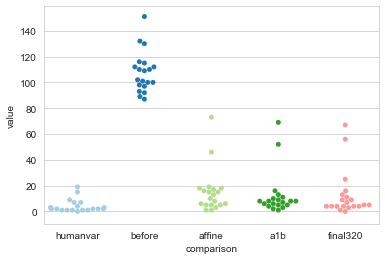

In [41]:
pts_df_sub = pts_df[pts_df.comparison!='final315']
pts_df_sub = pts_df_sub[pts_df_sub.comparison!='final315v320']

ax = sns.set_style('whitegrid')
ax=sns.set_palette("Paired")
ax= sns.swarmplot(x='comparison',y='value',data=pts_df_sub)


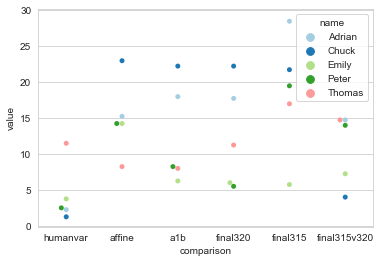

In [35]:
ax=sns.set_palette("Paired")
ax = sns.set_style('whitegrid')
ax= sns.swarmplot(x='comparison',y='value',data=collapsed_pts_df[collapsed_pts_df.comparison!='before'],hue='name')

[(0.396078431372549, 0.7294117647058823, 0.8549019607843137),
 (0.5294117647058824, 0.8156862745098039, 0.8862745098039215),
 (0.023529411764705882, 0.5568627450980392, 0.5490196078431373),
 (0.4588235294117647, 0.7019607843137254, 0.6549019607843137),
 (0.0, 0.6549019607843137, 0.3411764705882353),
 (0.5098039215686274, 0.7294117647058823, 0.30980392156862746),
 (0.8980392156862745, 0.7294117647058823, 0.3215686274509804),
 (0.9529411764705882, 0.9176470588235294, 0.12156862745098039),
 (0.8470588235294118, 0.43529411764705883, 0.15294117647058825),
 (0.9098039215686274, 0.6196078431372549, 0.13725490196078433),
 (0.7843137254901961, 0.1803921568627451, 0.4196078431372549),
 (0.8313725490196079, 0.4, 0.5607843137254902),
 (0.6, 0.10588235294117647, 0.21568627450980393),
 (0.7647058823529411, 0.0, 0.12941176470588237),
 (0.21176470588235294, 0.25882352941176473, 0.5215686274509804),
 (0.36470588235294116, 0.3215686274509804, 0.5882352941176471),
 (0.49019607843137253, 0.329411764705882

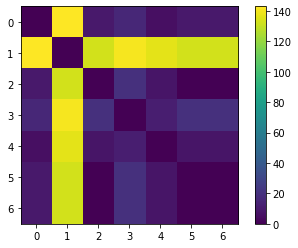

In [60]:
plt.imshow(pt1mat)
plt.colorbar()
